In [27]:
# python -m site    RUN THIS IN THIS PATH TO CHECK KERNEL AND OTHER THINGS

In [ ]:
from langgraph.graph import StateGraph
from langgraph.graph import START, END
from typing import TypedDict

In [29]:
# 1) Define state 

# class StateName(TypedDict):
#     object = DateType
#     object = DateType
#     object = DateType

class GradeState(TypedDict):
    Science:float
    Maths:float
    English:float
    grade:str

In [30]:
def CalcGrade(state: GradeState)->dict:
    Grade = state["Science"]+state["Maths"]+state["English"]
    if Grade>90:
        state["grade"] = "A"
    elif (Grade>70):
        state["grade"] = "B"
    elif (Grade>60):
        state["grade"] = "C"
    else:
        state["grade"] = "F"
    return state

In [31]:
# 2) Define Graph

# Name = StateGraph(State)

graph = StateGraph(GradeState)

# Add nodes

graph.add_node("CalcGrade", CalcGrade)

# Add Edges
graph.add_edge(START, "CalcGrade")
graph.add_edge("CalcGrade", END)


# Compile Graph

workflow = graph.compile()

In [32]:
initial_state = {
    "Science": 90,
    "Maths": 90,
    "English": 90
}


final_state = workflow.invoke(initial_state)

print(final_state["grade"])


A


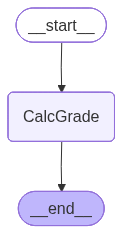

In [33]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())